In [114]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [115]:
# Loading MNIST data
import keras
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [116]:
x_train = np.array([255 - cv2.resize(image, (14, 14)) for image in x_train])
x_test = np.array([255 - cv2.resize(image, (14, 14)) for image in x_test])

In [117]:
x_train_unpacked = np.array([np.concatenate(image) for image in x_train])/255.0
x_test_unpacked = np.array([np.concatenate(image) for image in x_test])/255.0

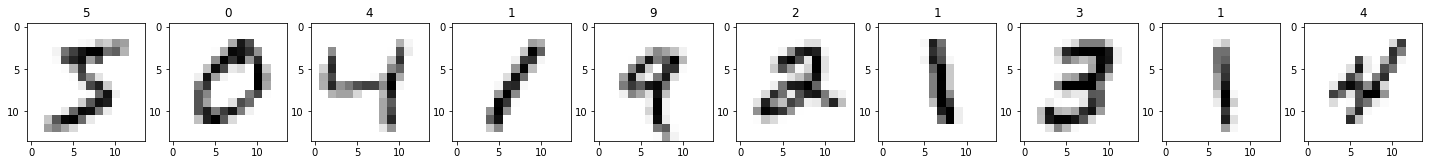

In [118]:
fig, ax = plt.subplots(1, 10, figsize=(25, 10))

for i in range(10):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].set_title(y_train[i])
    
plt.show()

# Training different classifiers

In [119]:
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [120]:
x_train_sample = x_train_unpacked[0:10000]
y_train_sample = y_train[0:10000]
x_validation_sample = x_train_unpacked[10000:11000]
y_validation_sample = y_train[10000:11000]

In [121]:
# KNN
for i in range(1, 10):
    weight = "distance"
    
    clf = KNeighborsClassifier(i, n_jobs=8, weights = weight)
    clf.fit(x_train_sample, y_train_sample)

    y_pred = clf.predict(x_validation_sample)

    accuracy = accuracy_score(y_validation_sample, y_pred, normalize=True, sample_weight=None)
    error = 1 - accuracy

    print(f"N_neighbors: {i}, Weight: {weight}, Error rate: {error*100}%")

N_neighbors: 1, Weight: distance, Error rate: 4.0000000000000036%
N_neighbors: 2, Weight: distance, Error rate: 4.0000000000000036%
N_neighbors: 3, Weight: distance, Error rate: 3.200000000000003%
N_neighbors: 4, Weight: distance, Error rate: 3.200000000000003%
N_neighbors: 5, Weight: distance, Error rate: 3.200000000000003%
N_neighbors: 6, Weight: distance, Error rate: 3.200000000000003%
N_neighbors: 7, Weight: distance, Error rate: 3.1000000000000028%
N_neighbors: 8, Weight: distance, Error rate: 3.200000000000003%
N_neighbors: 9, Weight: distance, Error rate: 3.8000000000000034%


In [122]:
n_neighbors = 5

clf = KNeighborsClassifier(n_neighbors, n_jobs=8, weights = "distance")

clf.fit(x_train_unpacked, y_train)

y_pred = clf.predict(x_test_unpacked)

accuracy = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
error = 1 - accuracy

print(f"Error rate: {error*100}%")

Error rate: 2.529999999999999%
